# Review the data sets to see if there is a correllation between time of day and crime/ride occurrences.
We'll use pie charts to see which time frames have the highest percentages of all rides and crimes.

In [1]:
# Import dependencies
import matplotlib
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Read in CSVs
ride_data = pd.read_csv('Rides_Data_Clean_Bounded.csv')
ride_df = ride_data.drop('Unnamed: 0', 1)
ride_df = ride_df.drop('Unnamed: 0.1', 1)
crime_data = pd.read_csv("Crime_Reports_Clean.csv")
crime_df = crime_data.drop ('Unnamed: 0', 1)

In [2]:
# Starting with crime data, check the formatting of time
crime_df.head()

,Highest Offense Description,Occurred Date Time,Occurred Date,Occurred Time,Address,Zip Code,Latitude,Longitude,Location,Date,Month
0,PUBLIC INTOXICATION,04/13/2017 02:10:00 PM,04/13/2017,1410.0,MANCHACA RD / W BEN WHITE BLVD SVRD EB,78745.0,30.229632,-97.788527,"(30.22963221, -97.78852736)",2017-04-13 14:10:00+00:00,4
1,DWI,04/13/2017 04:03:00 AM,04/13/2017,403.0,CONGRESS AVE / W 2ND ST,78701.0,30.264319,-97.744203,"(30.26431941, -97.74420303)",2017-04-13 04:03:00+00:00,4
2,DWI,04/13/2017 02:24:00 AM,04/13/2017,224.0,9200 WALL ST,78754.0,30.343829,-97.669528,"(30.34382873, -97.66952842)",2017-04-13 02:24:00+00:00,4
3,DWI,04/13/2017 01:41:00 AM,04/13/2017,141.0,217 E 4TH ST,78701.0,30.265491,-97.741203,"(30.2654909, -97.74120279)",2017-04-13 01:41:00+00:00,4
4,DWI,04/13/2017 01:25:00 AM,04/13/2017,125.0,W 51ST ST / N LAMAR BLVD,78751.0,30.318767,-97.730828,"(30.3187666, -97.73082849)",2017-04-13 01:25:00+00:00,4


In [3]:
# Create bins in which to place values based upon time frames measured from 000-2359
bins = [0, 159, 359, 559, 759, 959, 1159, 1359, 1559, 1759, 1959, 2159, 2359]

# Create labels for these bins
group_names = ["12a-2a", "2a-4a", "4a-6a", "6a-8a", "8a-10a", "10a-12p", "12p-2p", "2p-4p", "4p-6p", "6p-8p", "8p-10p", "10p-12a"]

In [4]:
# Put the bins in a new column in the dataframe
crime_df["Time Frame"] = pd.cut(crime_df["Occurred Time"], bins, labels=group_names)
crime_df.head()

,Highest Offense Description,Occurred Date Time,Occurred Date,Occurred Time,Address,Zip Code,Latitude,Longitude,Location,Date,Month,Time Frame
0,PUBLIC INTOXICATION,04/13/2017 02:10:00 PM,04/13/2017,1410.0,MANCHACA RD / W BEN WHITE BLVD SVRD EB,78745.0,30.229632,-97.788527,"(30.22963221, -97.78852736)",2017-04-13 14:10:00+00:00,4,2p-4p
1,DWI,04/13/2017 04:03:00 AM,04/13/2017,403.0,CONGRESS AVE / W 2ND ST,78701.0,30.264319,-97.744203,"(30.26431941, -97.74420303)",2017-04-13 04:03:00+00:00,4,4a-6a
2,DWI,04/13/2017 02:24:00 AM,04/13/2017,224.0,9200 WALL ST,78754.0,30.343829,-97.669528,"(30.34382873, -97.66952842)",2017-04-13 02:24:00+00:00,4,2a-4a
3,DWI,04/13/2017 01:41:00 AM,04/13/2017,141.0,217 E 4TH ST,78701.0,30.265491,-97.741203,"(30.2654909, -97.74120279)",2017-04-13 01:41:00+00:00,4,12a-2a
4,DWI,04/13/2017 01:25:00 AM,04/13/2017,125.0,W 51ST ST / N LAMAR BLVD,78751.0,30.318767,-97.730828,"(30.3187666, -97.73082849)",2017-04-13 01:25:00+00:00,4,12a-2a


In [5]:
# Create a new dataframe with just the info needed for our pie charts
newcrime_df=pd.DataFrame(crime_df.groupby(['Time Frame'])['Time Frame'].count())
newcrime_df.rename(columns= {"Time Frame": 'Time Frame', 
                        "Time Frame":"Number of Occurrences"}, 
                                 inplace = True) 
newcrime_df.reset_index(inplace = True)
newcrime_df

,Time Frame,Number of Occurrences
0,12a-2a,1577
1,2a-4a,1292
2,4a-6a,322
3,6a-8a,118
4,8a-10a,113
5,10a-12p,127
6,12p-2p,101
7,2p-4p,138
8,4p-6p,274
9,6p-8p,426


In [6]:
# Now check the formatting of time for ride data
ride_df.head()

,created_date,end_location_lat,end_location_long,start_location_lat,start_location_long,Date
0,2016-06-04 09:52:35-05:00,30.271,-97.742,30.247,-97.764,2016-06-04 09:52:35-05:00
1,2016-06-04 10:23:25-05:00,30.269,-97.752,30.269,-97.750,2016-06-04 10:23:25-05:00
2,2016-06-04 22:32:42-05:00,30.270,-97.749,30.258,-97.749,2016-06-04 22:32:42-05:00
3,2016-06-04 23:06:20-05:00,30.267,-97.745,30.203,-97.771,2016-06-04 23:06:20-05:00
4,2016-06-05 01:54:08-05:00,30.242,-97.781,30.270,-97.750,2016-06-05 01:54:08-05:00


In [7]:
# Time is only available in the Date column, so convert Date to datetime object so that we can extract the hour
ride_df["Date"]=pd.to_datetime(ride_df["Date"], utc=True)
# Check that it worked
ride_df.dtypes

created_date                        object
end_location_lat                   float64
end_location_long                  float64
start_location_lat                 float64
start_location_long                float64
Date                   datetime64[ns, UTC]
dtype: object

In [8]:
# Extract the hour and add to a new column
ride_df['Hour'] = ride_df['Date'].dt.hour
ride_df.head()

,created_date,end_location_lat,end_location_long,start_location_lat,start_location_long,Date,Hour
0,2016-06-04 09:52:35-05:00,30.271,-97.742,30.247,-97.764,2016-06-04 14:52:35+00:00,14
1,2016-06-04 10:23:25-05:00,30.269,-97.752,30.269,-97.750,2016-06-04 15:23:25+00:00,15
2,2016-06-04 22:32:42-05:00,30.270,-97.749,30.258,-97.749,2016-06-05 03:32:42+00:00,3
3,2016-06-04 23:06:20-05:00,30.267,-97.745,30.203,-97.771,2016-06-05 04:06:20+00:00,4
4,2016-06-05 01:54:08-05:00,30.242,-97.781,30.270,-97.750,2016-06-05 06:54:08+00:00,6


In [9]:
# Create bins in which to place values based upon time frames measured from 0-24
bins2 = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]

# Create labels for these bins
group_names2 = ["12a-2a", "2a-4a", "4a-6a", "6a-8a", "8a-10a", "10a-12p", "12p-2p", "2p-4p", "4p-6p", "6p-8p", "8p-10p", "10p-12a"]

In [10]:
# Put the bins in a new column in the dataframe
ride_df["Time Frame"] = pd.cut(ride_df["Hour"], bins2, labels=group_names2)
ride_df.head()

,created_date,end_location_lat,end_location_long,start_location_lat,start_location_long,Date,Hour,Time Frame
0,2016-06-04 09:52:35-05:00,30.271,-97.742,30.247,-97.764,2016-06-04 14:52:35+00:00,14,12p-2p
1,2016-06-04 10:23:25-05:00,30.269,-97.752,30.269,-97.750,2016-06-04 15:23:25+00:00,15,2p-4p
2,2016-06-04 22:32:42-05:00,30.270,-97.749,30.258,-97.749,2016-06-05 03:32:42+00:00,3,2a-4a
3,2016-06-04 23:06:20-05:00,30.267,-97.745,30.203,-97.771,2016-06-05 04:06:20+00:00,4,2a-4a
4,2016-06-05 01:54:08-05:00,30.242,-97.781,30.270,-97.750,2016-06-05 06:54:08+00:00,6,4a-6a


In [11]:
# Create a new dataframe with just the info we need for our pie charts
newride_df=pd.DataFrame(ride_df.groupby(['Time Frame'])['Time Frame'].count())
newride_df.rename(columns= {'Time Frame': 'Time Frame', 
                        'Time Frame':'Number of Occurrences'}, 
                                 inplace = True) 
newride_df.reset_index(inplace = True)
newride_df

,Time Frame,Number of Occurrences
0,12a-2a,190819
1,2a-4a,207952
2,4a-6a,172063
3,6a-8a,107177
4,8a-10a,32093
5,10a-12p,36779
6,12p-2p,80354
7,2p-4p,105132
8,4p-6p,114450
9,6p-8p,122600


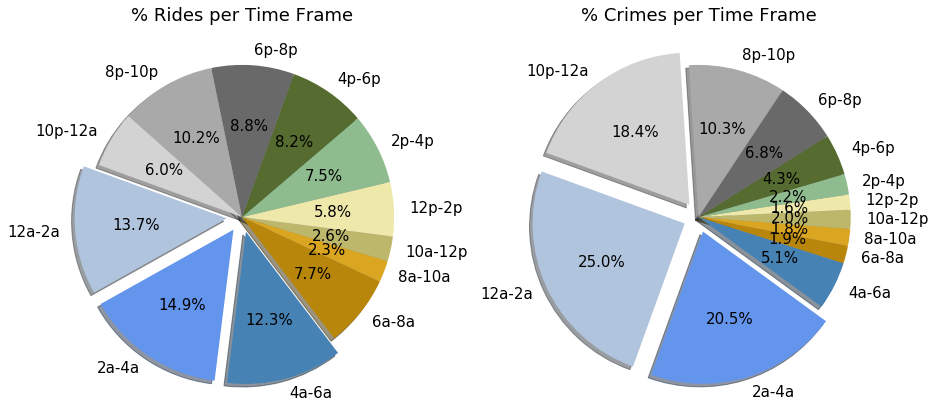

In [28]:
# Calculate percents
ride_time = newride_df.groupby(['Time Frame'])['Number of Occurrences'].sum()
crime_time = newcrime_df.groupby(['Time Frame'])['Number of Occurrences'].sum()

# Create a figure with two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

labels = ["12a-2a","2a-4a","4a-6a","6a-8a","8a-10a","10a-12p","12p-2p","2p-4p","4p-6p","6p-8p","8p-10p","10p-12a"]
colors = ["lightsteelblue","cornflowerblue","steelblue","darkgoldenrod","goldenrod","darkkhaki","palegoldenrod","darkseagreen","darkolivegreen","dimgrey","darkgrey","lightgrey"]
explode_crimes = (.1, .1, 0, 0, 0, 0, 0, 0, 0, 0, 0, .1)
explode_rides = (.1, .1, .1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# plot each pie chart in a separate subplot
ax1.pie(ride_time, labels=labels, colors=colors, explode=explode_rides, autopct="%1.1f%%",shadow=True, startangle=160)
ax2.pie(crime_time, labels=labels, colors=colors, explode=explode_crimes, autopct="%1.1f%%",shadow=True, startangle=160)
ax1.title.set_text('% Rides per Time Frame')
ax2.title.set_text('% Crimes per Time Frame')
plt.rcParams.update({'font.size': 15})
plt.show()

In [29]:
# Save the figure
fig.savefig("time_frame_pies.png")

We can see that most rides (40.9%) happen between 12:00 am - 6:00 am and most crimes (63.9%) happen from 10:00 pm - 4:00 am.